In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date

pd.plotting.register_matplotlib_converters()

In [2]:
simbolo='SPY'
nome='SPY'
inizio=date(2018,1,1)
fine=date.today()
data=yf.download(simbolo,inizio,fine)
df=pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,267.839996,268.809998,267.399994,268.769989,258.858276,86655700
2018-01-03,268.959991,270.640015,268.959991,270.470001,260.495544,90070400
2018-01-04,271.200012,272.160004,270.540009,271.609985,261.593475,80636400
2018-01-05,272.510010,273.559998,271.950012,273.420013,263.336731,83524000
2018-01-08,273.309998,274.100006,272.980011,273.920013,263.818329,57319200


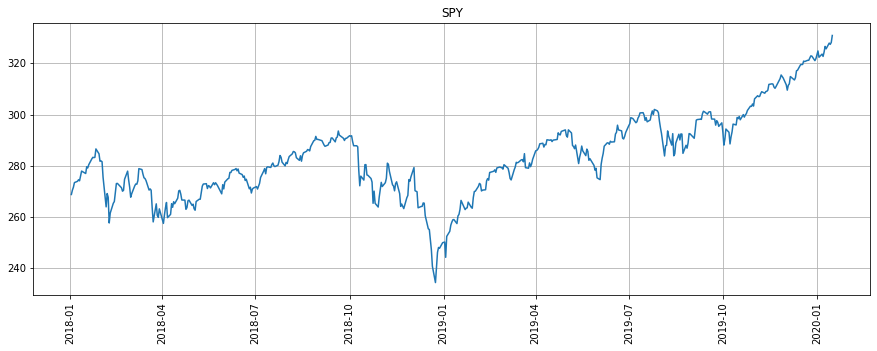

In [4]:
plt.figure(num=None, figsize=(15, 5))
plt.xticks(rotation='vertical')
plt.grid()
plt.title(nome)
plt.plot(df['Close'])
plt.show()

[*********************100%***********************]  1 of 1 completed


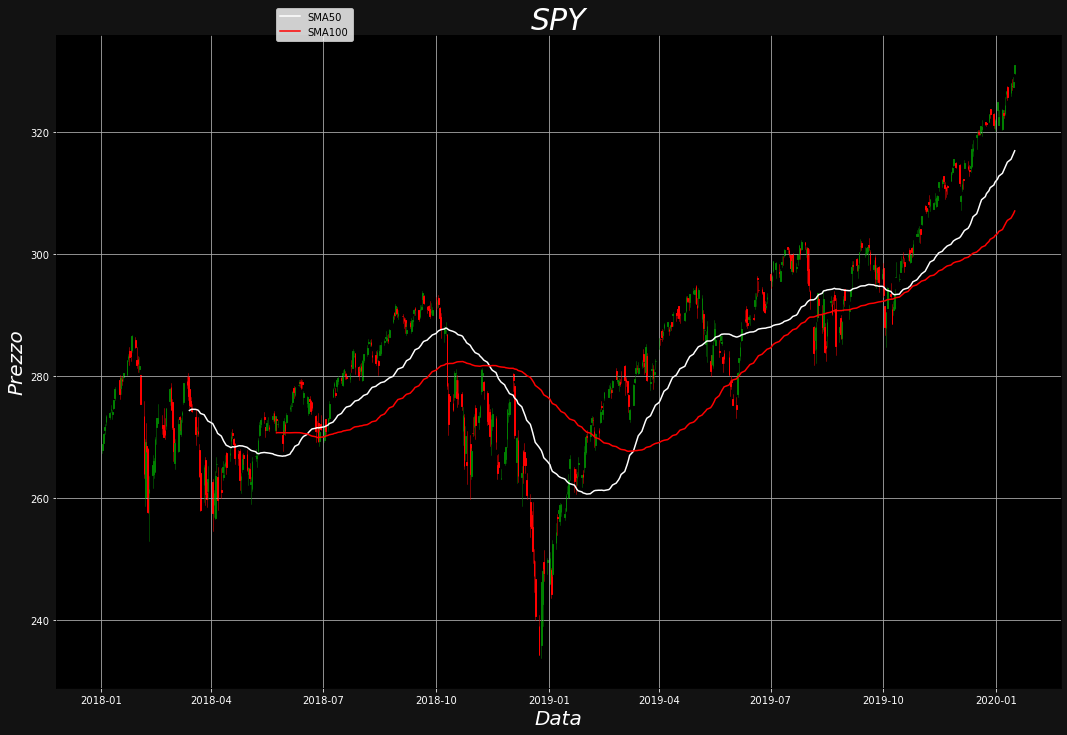

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
simbolo='SPY'
nome='SPY'
inizio=date(2018,1,1)
fine=date.today()
data=yf.download(simbolo,inizio,fine)
df=pd.DataFrame(data)
df.head()
df.head()
df.reset_index(inplace=True)
df['Date'] = df['Date'].map(mdates.date2num)
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(111)
ax1.set_title(nome,size=30, color='white',style='italic')
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.xaxis_date()
candlestick_ohlc(ax1, df.values, width=0.6, colorup='green', colordown='red', alpha=1)
ax1.grid()
df['SMA50'] = df['Close'].rolling(50).mean()
df['SMA100'] = df['Close'].rolling(100).mean()
ax1.plot(df['Date'], df['SMA50'], color='white', label='SMA50')
ax1.plot(df['Date'], df['SMA100'], color='red', label='SMA100')
plt.xlabel('Data',size=20, color='white',style='italic')
plt.ylabel('Prezzo',size=20, color='white',style='italic')
plt.legend(bbox_to_anchor=(0.3, 1.05))
plt.show()

[*********************100%***********************]  1 of 1 completed


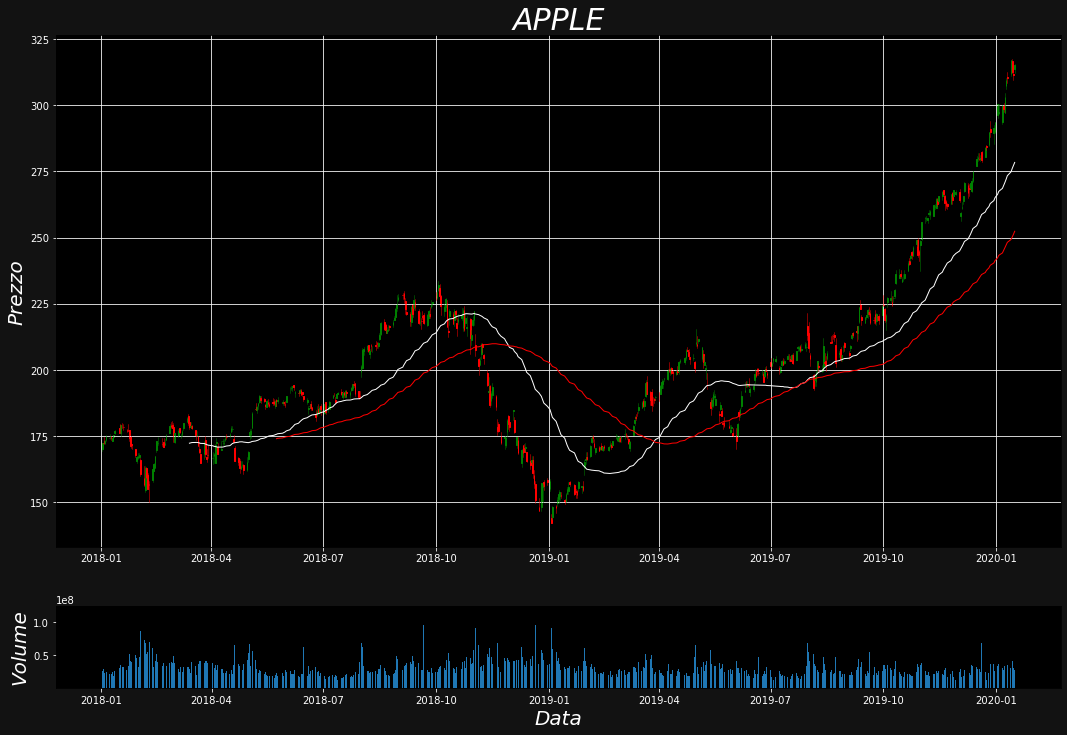

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec

simbolo='AAPL'
nome='APPLE'
inizio=date(2018,1,1)
fine=date.today()
data=yf.download(simbolo,inizio,fine)
df=pd.DataFrame(data)
df.head()

df.reset_index(inplace=True)
df['Date'] = df['Date'].map(mdates.date2num)
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(2, 1,height_ratios=[5, 0.8])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax1.set_title(nome,size=30, color='white',style='italic')
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.xaxis_date()
ax1.grid(True, color='white')
candlestick_ohlc(ax1, df.values, width=0.6, colorup='green', colordown='red', alpha=1)
df['SMA50'] = df['Close'].rolling(50).mean()
df['SMA100'] = df['Close'].rolling(100).mean()
ax1.plot(df['Date'], df['SMA50'], color='white', label='SMA50',linewidth=1)
ax1.plot(df['Date'], df['SMA100'], color='red', label='SMA100',linewidth=1)
ax1.set_ylabel('Prezzo',size=20, color='white',style='italic')
ax2.set_facecolor('black')
ax2.set_ylim(1.3*df['Volume'].max())
ax2.set_xlabel('Data',size=20, color='white',style='italic')
ax2.set_ylabel('Volume',size=20, color='white',style='italic')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
ax2.bar(df['Date'],df['Volume'])
ax2.invert_yaxis()
ax2.grid(False)
ax2.xaxis_date()
plt.show()

[*********************100%***********************]  1 of 1 completed


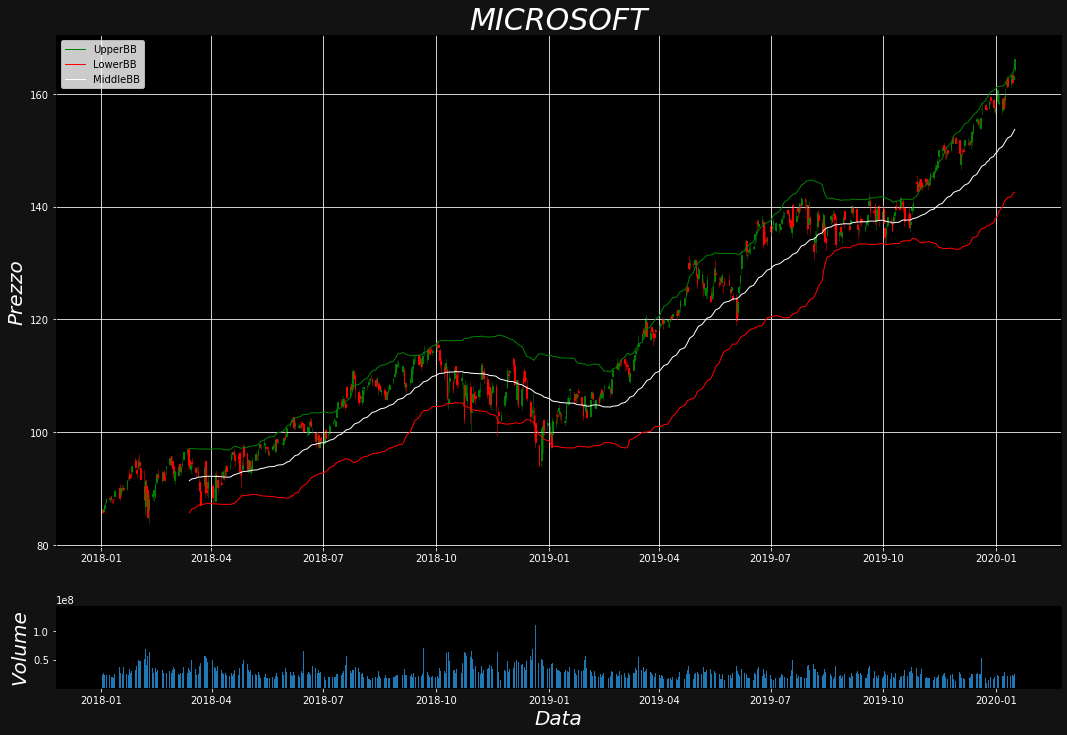

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec

simbolo='MSFT'
nome='MICROSOFT'
inizio=date(2018,1,1)
fine=date.today()
data=yf.download(simbolo,inizio,fine)
df=pd.DataFrame(data)
df.head()

df.reset_index(inplace=True)
df['Date'] = df['Date'].map(mdates.date2num)
n = 50
def BBANDS(data, window=n):
 MA = data.Close.rolling(window=n).mean()
 SD = data.Close.rolling(window=n).std()
 data['UpperBB'] = MA + (2 * SD) 
 data['LowerBB'] = MA - (2 * SD)
 data['MiddleBB'] = MA   
 return data


MYBBANDS = BBANDS(df, n)
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(2, 1,height_ratios=[5, 0.8])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax1.set_title(nome,size=30, color='white',style='italic')
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.xaxis_date()
ax1.grid(True, color='white')
candlestick_ohlc(ax1, df.values, width=0.6, colorup='green', colordown='red', alpha=1)
ax1.plot(df['Date'], MYBBANDS.UpperBB, color='green', label='UpperBB',linewidth=1)
ax1.plot(df['Date'], MYBBANDS.LowerBB, color='red', label='LowerBB',linewidth=1)
ax1.plot(df['Date'], MYBBANDS.MiddleBB, color='white', label='MiddleBB',linewidth=1)
ax1.set_ylabel('Prezzo',size=20, color='white',style='italic')
ax1.legend()
ax2.set_facecolor('black')
ax2.set_ylim(1.3*df['Volume'].max())
ax2.set_xlabel('Data',size=20, color='white',style='italic')
ax2.set_ylabel('Volume',size=20, color='white',style='italic')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
ax2.bar(df['Date'],df['Volume'])
ax2.invert_yaxis()
ax2.grid(False)
ax2.xaxis_date()
plt.show()